In [1]:
%matplotlib inline

In [2]:
import os, sys
sys.path.append('/scratch/ua349/pose/tf/ver1')

DATA_DIR = '/beegfs/ua349/lstm/coco'
from tensorpack.dataflow.common import BatchData, MapData

def batch_dataflow(df, batch_size, time_steps=4, num_stages=6):
        """
        The function builds batch dataflow from the input dataflow of samples

        :param df: dataflow of samples
        :param batch_size: batch size
        :return: dataflow of batches
        """
        df = BatchData(df, batch_size, use_list=False)
        df = MapData(df, lambda x: (
            [
                x[0],
                x[2]
            ],
            [x[4]] * num_stages
        ))
        df.reset_state()
        return df

/share/apps/python3/3.6.3/intel/lib/python3.6/site-packages/h5py-2.7.1-py3.6-linux-x86_64.egg/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from training.dataset import get_dataflow

dataset = 'val'
batch_size = 1

def gen(df):
    while True:
        for i in df.get_data():
            yield i

df = get_dataflow(
    annot_path='%s/annotations/person_keypoints_%s2017.json' % (DATA_DIR, dataset),
    img_dir='%s/%s2017/' % (DATA_DIR, dataset))
train_df = batch_dataflow(df, batch_size)
train_gen = gen(train_df)

loading annotations into memory...
Done (t=0.31s)
creating index...
index created!
Loading image annot 4000/5000
[0717 15:34:15 @parallel.py:290] [PrefetchDataZMQ] Will fork a dataflow more than one times. This assumes the datapoints are i.i.d.


In [41]:
import numpy as np

for (inp, targets) in train_gen:
    break
target = targets[-1][0].astype(np.float32)

In [42]:
import matplotlib.pyplot as plt

In [43]:
# print(target.shape)

video1 = inp[0][0]
mask1 = inp[1][0]
heat1 = targets[-1][0]

print(video1.shape)
print(mask1.shape)
print(heat1.shape)

(368, 368, 3)
(46, 46, 19)
(46, 46, 19)


float16
(46, 46)


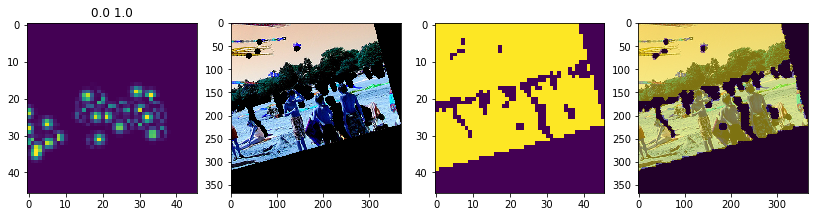

Masked out joints: []


In [44]:
import cv2
import matplotlib.pyplot as plt


print(video1.dtype)
plt.figure(figsize=(14, 14))

plt.subplot(1, 4, 1)
print(heat1[:,:, -1].shape)

canvas = np.zeros((46, 46))
for ii in range(18):
    canvas[heat1[:, :, ii] > 0] = heat1[:, :, ii][heat1[:, :, ii] > 0]

plt.gca().set_title('%.1f %.1f' % (np.min(canvas), np.max(canvas)))
plt.imshow(canvas)

plt.subplot(1, 4, 2)
plt.imshow(video1.astype(np.float32)/256)

plt.subplot(1, 4, 3)
plt.imshow(mask1[:, :, 0])

plt.subplot(1, 4, 4)
plt.imshow(video1.astype(np.float32)/256)
plt.imshow(cv2.resize(mask1[:, :, 0], (0,0), fx=8, fy=8), alpha=0.5)

plt.show()


missing = []
for ii in range(19):
    if np.max(mask1[:, :, ii]) == 0:
        missing.append(ii)
print('Masked out joints:', missing)

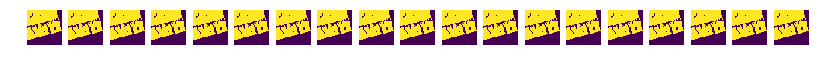

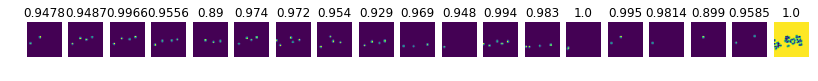

In [45]:

import matplotlib.pyplot as plt



plt.figure(figsize=(14, 14))
for ii in range(19):
    plt.subplot(1, 19, ii+1)
    plt.axis('off')
    plt.imshow(mask1[:, :, ii], vmin=0, vmax=1)

plt.show()

plt.figure(figsize=(14, 14))
for ii in range(19):
    plt.subplot(1, 19, ii+1)
    plt.axis('off')
    plt.gca().set_title(np.max(heat1[:, :, ii]))
    plt.imshow(heat1[:, :, ii].astype(np.float32), vmin=0, vmax=1)

plt.show()